In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel

df=pd.read_csv("/home/vanemtzl/Evaluación 2/solar.csv")

In [2]:
df.columns

Index(['Año', 'Mes', 'Año Mes', 'No. manchas', 'x', 'y', 'Unnamed: 6'], dtype='object')

In [3]:
#Para eliminar la columna que no tiene datos sólo asteriscos al final
del df['Unnamed: 6']

In [4]:
df.head()

,Año,Mes,Año Mes,No. manchas,x,y
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Año            0
Mes            0
Año Mes        0
No. manchas    0
x              0
y              0
dtype: int64

In [6]:
df.tail()

,Año,Mes,Año Mes,No. manchas,x,y
3208,2016,5,2016.373,52.1,4.7,810
3209,2016,6,2016.456,20.9,2.2,886
3210,2016,7,2016.540,32.5,3.7,910
3211,2016,8,2016.624,50.7,4.4,879
3212,2016,9,2016.708,44.7,3.8,742


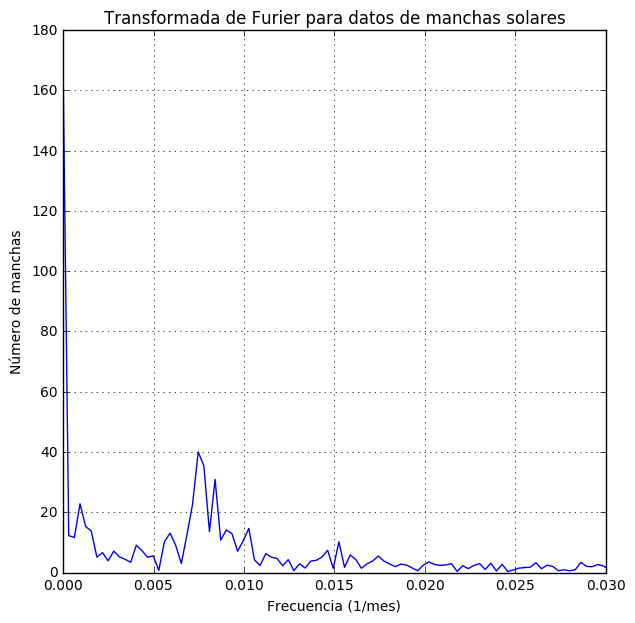

In [14]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 3213
# sample spacing
T = 1
x = df['Mes']
y = df['No. manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yplot))
plt.xlim(0, 0.03)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.title('Transformada de Furier para datos de manchas solares')

plt.xlabel("Frecuencia (1/mes)")
plt.ylabel("Número de manchas")

plt.grid()
plt.show()

In [8]:
a = 2*np.absolute(yf)/N

In [9]:
print(np.where(a[:,]>15))
b= a[a[:,]>15]
b

(array([   0,    3,    4,   23,   24,   25,   27, 3186, 3188, 3189, 3190,
       3209, 3210]),)


array([ 165.84712107,   22.79918361,   15.28281214,   22.67815211,
         39.98723321,   35.419832  ,   30.90803788,   30.90803788,
         35.419832  ,   39.98723321,   22.67815211,   15.28281214,
         22.79918361])

In [18]:
#Número de manchas
A1= 2*np.absolute(yf[23,]/N)
A2= 2*np.absolute(yf[24,]/N)
A3= 2*np.absolute(yf[25,]/N)

#Frecuencia
f1= xf[int(N/2 +23),]
f2= xf[int(N/2 +24),]
f3= xf[int(N/2 +25),]

#Periodo
p1= 1/(f1*12)
p2= 1/(f2*12)
p3= 1/(f3*12)

In [20]:
print('Número de manchas=', A1)
print('Frecuencia=', f1, '1/mes')
print('Período=', p1, 'año')
print()

print('Número de manchas=', A2)
print('Frecuencia=', f2, '1/mes')
print('Período=', p2, 'año')
print()

print('Número de manchas=', A3)
print('Frecuencia=', f3, '1/mes')
print('Período=', p3, 'año')
print()

print('Promedio de frecuencias:', (f1+f2+f3)/3)

Número de manchas= 22.6781521056
Frecuencia= 0.00715841892312 1/mes
Período= 11.6413043478 año

Número de manchas= 39.9872332086
Frecuencia= 0.00746965452848 1/mes
Período= 11.15625 año

Número de manchas= 35.4198320032
Frecuencia= 0.00778089013383 1/mes
Período= 10.71 año

Promedio de frecuencias: 0.00746965452848


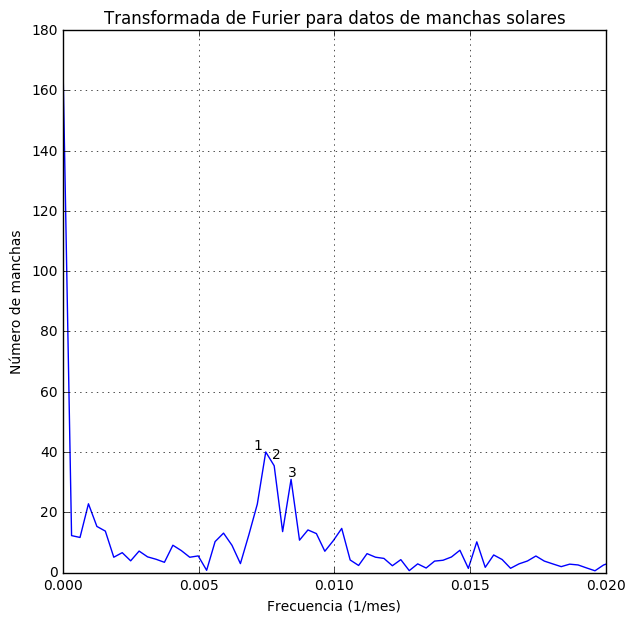

In [15]:
#Gráfica con etiquetas de los modos encontrados
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 3213
# sample spacing
T = 1
x = df['Mes']
y = df['No. manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yplot))
plt.xlim(0, 0.02)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.title('Transformada de Furier para datos de manchas solares')

plt.xlabel("Frecuencia (1/mes)")
plt.ylabel("Número de manchas")

plt.text(0.007,41,"1")
plt.text(0.0077,38,"2")
plt.text(.0083,32,"3")

plt.grid()
plt.show()

In [21]:
a = 2*np.absolute(yf)/N

In [22]:
print(np.where(a[:,]>10))
b= a[a[:,]>10]
b

(array([   0,    1,    2,    3,    4,    5,   18,   19,   22,   23,   24,
         25,   26,   27,   28,   29,   30,   32,   33,   49, 3164, 3180,
       3181, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3194,
       3195, 3208, 3209, 3210, 3211, 3212]),)


array([ 165.84712107,   12.2404616 ,   11.62644929,   22.79918361,
         15.28281214,   13.73590511,   10.24940903,   13.06489499,
         12.50737479,   22.67815211,   39.98723321,   35.419832  ,
         13.56290861,   30.90803788,   10.73240059,   14.12154193,
         12.90840658,   10.55344184,   14.6282459 ,   10.17270309,
         10.17270309,   14.6282459 ,   10.55344184,   12.90840658,
         14.12154193,   10.73240059,   30.90803788,   13.56290861,
         35.419832  ,   39.98723321,   22.67815211,   12.50737479,
         13.06489499,   10.24940903,   13.73590511,   15.28281214,
         22.79918361,   11.62644929,   12.2404616 ])

In [42]:
#Otros modos
print('Número de manchas o amplitudes')
print(2*np.absolute(yf[3,]/N))
print(2*np.absolute(yf[4,]/N))
print(2*np.absolute(yf[5,]/N))
print(2*np.absolute(yf[19,]/N))
print(2*np.absolute(yf[26,]/N))
print(2*np.absolute(yf[27,]/N))
print(2*np.absolute(yf[29,]/N))
print()

print('Frecuencias')
print(xf[int(N/2 +3),])
print(xf[int(N/2 +4),])
print(xf[int(N/2 +5),])
print(xf[int(N/2 +19),])
print(xf[int(N/2 +26),])
print(xf[int(N/2 +27),])
print(xf[int(N/2 +29),])

Número de manchas o amplitudes
22.7991836131
15.2828121366
13.7359051105
13.0648949851
13.5629086055
30.9080378809
14.1215419264

Frecuencias
0.00093370681606
0.00124494242141
0.00155617802677
0.00591347650171
0.00809212573918
0.00840336134454
0.00902583255524
